In [228]:
import pandas as pd
from urllib.parse import unquote
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

In [229]:
# Define a tuple of file paths and column names
files_and_columns = (
    ('../data/paths_finished.tsv', ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating']),
    ('../data/paths_unfinished.tsv', ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type']),
    ('../data/articles.tsv', ['article']),
    ('../data/categories.tsv', ['article', 'category'])
)

def read_files(file_tuples):
    dataframes = []
    for path, column_names in file_tuples:
        df = pd.read_csv(path, sep='\t', comment='#', names=column_names, header=None)
        dataframes.append(df)
    return dataframes

paths_finished, paths_unfinished, articles, categories  = read_files(files_and_columns)

articles.head()

,article
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts


## Articles and categories

In [230]:
categories.head() 

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


In [231]:
from urllib.parse import unquote

# Decode the article names
articles['article'] = articles['article'].apply(lambda x: unquote(x))
categories['article'] = categories['article'].apply(lambda x: unquote(x))

categories


,article,category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...
1,Áedán_mac_Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


In [232]:
#some are not perfectly decoded

In [233]:
# Remove 'subject.' prefix and split each category string by '.'
categories_split = categories['category'].str.replace('^subject\.', '', regex=True).str.split('.')

# Create new columns based on the number of subcategories
max_depth = categories_split.apply(len).max()
for i in range(max_depth):
    categories[f'subcategory_{i + 1}'] = categories_split.apply(lambda x: x[i] if i < len(x) else None)

categories.drop(columns=['category'])

,article,subcategory_1,subcategory_2,subcategory_3
0,Áedán_mac_Gabráin,History,British_History,British_History_1500_and_before_including_Roma...
1,Áedán_mac_Gabráin,People,Historical_figures,None
2,Åland,Countries,None,None
3,Åland,Geography,European_Geography,European_Countries
4,Édouard_Manet,People,Artists,None
...,...,...,...,...
5199,Zirconium,Science,Chemistry,Chemical_elements
5200,Zoroaster,People,Religious_figures_and_leaders,None
5201,Zuid-Gelders,Geography,European_Geography,None
5202,Zuid-Gelders,Language_and_literature,Languages,None


In [234]:
articles_shape = articles.shape
categories_shape = categories.shape

unique_articles = articles['article'].nunique()
unique_categories = categories['article'].nunique()

article_counts = articles['article'].value_counts()
category_counts = categories['article'].value_counts()

articles_repetitions = (article_counts[article_counts > 1].sum())
categories_repetitions = (category_counts[category_counts > 1].sum())
categories_2repetitions = (category_counts[category_counts > 2].sum())
categories_3repetitions = (category_counts[category_counts > 3].sum())

print(f"Articles shape: {articles_shape}")
print(f"Categories shape: {categories_shape}")
print(f"Unique articles: {unique_articles}")
print(f"Unique categories articles: {unique_categories}")
print(f"Repetitions in articles: {articles_repetitions}")
print(f"Repetitions in categories articles: {categories_repetitions}")
print(f"2 Repetitions in categories articles: {categories_2repetitions}")
print(f"3 Repetitions in categories articles: {categories_3repetitions}")


Articles shape: (4604, 1)
Categories shape: (5204, 5)
Unique articles: 4604
Unique categories articles: 4598
Repetitions in articles: 0
Repetitions in categories articles: 1204
2 Repetitions in categories articles: 24
3 Repetitions in categories articles: 0


In [235]:
not_in_articles = categories[~categories['article'].isin(articles['article'])]

print("Categories not found in articles:", not_in_articles)

dont_have_category = articles[~articles['article'].isin(categories['article'])]

dont_have_category

Categories not found in articles: Empty DataFrame
Columns: [article, category, subcategory_1, subcategory_2, subcategory_3]
Index: []


,article
1210,Directdebit
1231,Donation
1600,Friend_Directdebit
3253,Pikachu
3849,Sponsorship_Directdebit
4545,Wowpurchase


## Path finished

In [236]:
paths_finished.head()

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [237]:
paths_finished.shape

(51318, 5)

In [238]:
paths_finished['timestamp'] = paths_finished['timestamp'].apply(lambda ts: datetime.fromtimestamp(ts, tz=timezone.utc))
paths_finished.head()


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49+00:00,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52+00:00,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40+00:00,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25+00:00,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08+00:00,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [239]:
def split_paths(data):
    path_split = data['path'].str.split(';')
    data['num_links'] = path_split.str.len()

    link_columns = {}

    max_length = data['num_links'].max()
    for i in range(max_length):
        link_columns[f'link_{i + 1}'] = path_split.apply(lambda x: x[i] if i < len(x) else None)

    links_df = pd.DataFrame(link_columns)

    data = pd.concat([data, links_df], axis=1)
    # data.drop(columns=['path'], inplace=True)
    return data

paths_finished=split_paths(paths_finished)
paths_finished


,hashedIpAddress,timestamp,durationInSec,path,rating,num_links,link_1,link_2,link_3,link_4,...,link_426,link_427,link_428,link_429,link_430,link_431,link_432,link_433,link_434,link_435
0,6a3701d319fc3754,2011-02-15 03:26:49+00:00,166,14th_century;15th_century;16th_century;Pacific...,NaN,9,14th_century,15th_century,16th_century,Pacific_Ocean,...,None,None,None,None,None,None,None,None,None,None
1,3824310e536af032,2012-08-12 06:36:52+00:00,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,5,14th_century,Europe,Africa,Atlantic_slave_trade,...,None,None,None,None,None,None,None,None,None,None
2,415612e93584d30e,2012-10-03 21:10:40+00:00,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,8,14th_century,Niger,Nigeria,British_Empire,...,None,None,None,None,None,None,None,None,None,None
3,64dd5cd342e3780c,2010-02-08 07:25:25+00:00,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,4,14th_century,Renaissance,Ancient_Greece,Greece,...,None,None,None,None,None,None,None,None,None,None
4,015245d773376aab,2013-04-23 15:27:08+00:00,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,7,14th_century,Italy,Roman_Catholic_Church,HIV,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35+00:00,66,Yagan;Ancient_Egypt;Civilization,NaN,3,Yagan,Ancient_Egypt,Civilization,None,...,None,None,None,None,None,None,None,None,None,None
51314,2ef7ac844cefda58,2011-03-16 05:42:18+00:00,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,9,Yagan,Folklore,Brothers_Grimm,<,...,None,None,None,None,None,None,None,None,None,None
51315,12863abb7887f890,2013-11-22 04:42:52+00:00,228,Yagan;Australia;England;France;United_States;T...,NaN,7,Yagan,Australia,England,France,...,None,None,None,None,None,None,None,None,None,None
51316,19f8284371753362,2011-02-27 07:42:47+00:00,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,4,Yarralumla%2C_Australian_Capital_Territory,Australia,United_States,Abraham_Lincoln,...,None,None,None,None,None,None,None,None,None,None


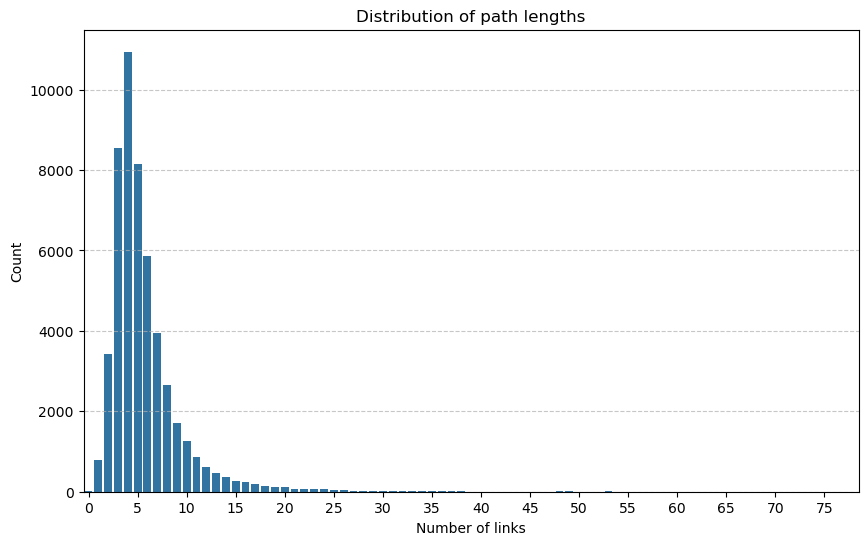

,path,num_links
8046,United_States;Washington%2C_D.C.;Government;Co...,435
19961,Napoleon_I_of_France;United_Kingdom;Great_Brit...,119
6945,Police_state;Police;United_States;Washington%2...,104
27136,Lake_Toba;Netherlands;Europe;Earth;United_Stat...,99
22845,Britney_Spears;Las_Vegas%2C_Nevada;<;Las_Vegas...,96
...,...,...
23347,Apple,1
50466,William_and_Mary,1
33832,Abel_Tasman,1
9872,Coal,1


In [240]:
max_length = paths_finished['num_links'].max()

plt.figure(figsize=(10, 6))
sns.countplot(x='num_links', data=paths_finished)
plt.title('Distribution of path lengths')
plt.xlabel('Number of links')
plt.ylabel('Count')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=current_ticks)
plt.xticks([tick for tick in current_ticks if tick % 5 == 0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sorted_path = paths_finished.sort_values(by='num_links', ascending=False)
sorted_path[['path', 'num_links']]

In [241]:
#what should we do when someone goes back? sign <

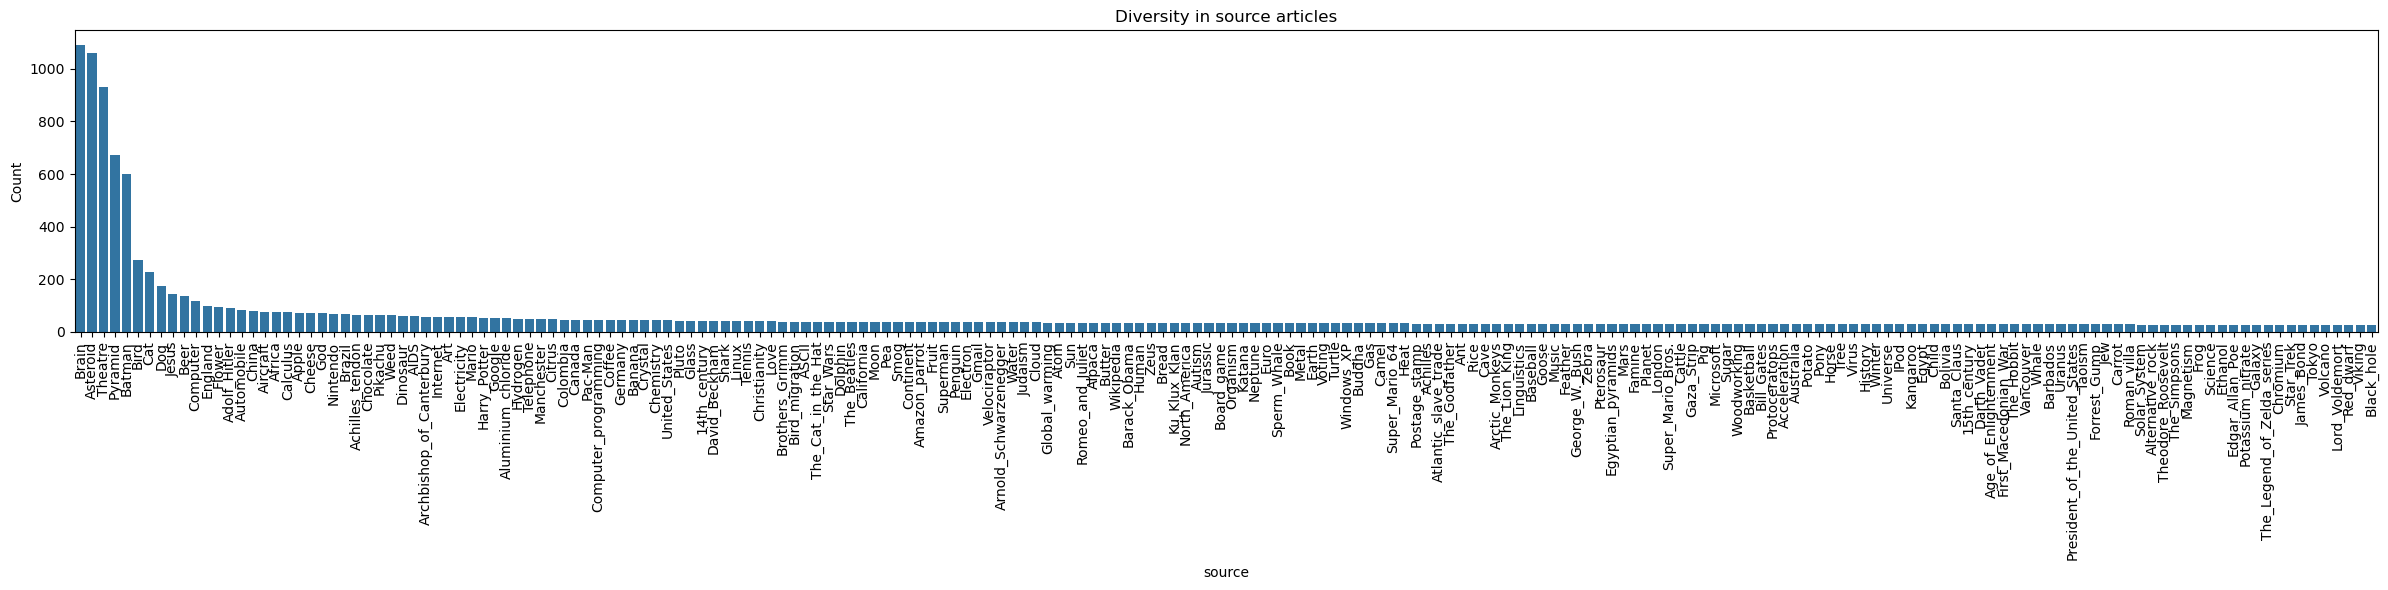

link_1
Brain                                1092
Asteroid                             1059
Theatre                               931
Pyramid                               674
Batman                                602
                                     ... 
El_Ni%C3%B1o-Southern_Oscillation       1
55_Cancri_b                             1
C%C3%B4te_d%27Ivoire                    1
%E2%82%AC2_commemorative_coins          1
Ziad_Jarrah                             1
Name: count, Length: 4134, dtype: int64

In [242]:
source_counts = paths_finished['link_1'].value_counts()
sorted_source = source_counts.sort_values(ascending=False)

plt.figure(figsize=(24, 6))
sns.barplot(x=sorted_source[:200].index, y=source_counts[:200].values)

plt.title('Diversity in source articles')
plt.xlabel('source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
sorted_source


Number of rows with valid ratings: 28501
Percentage of rows with valid ratings: 55.54%


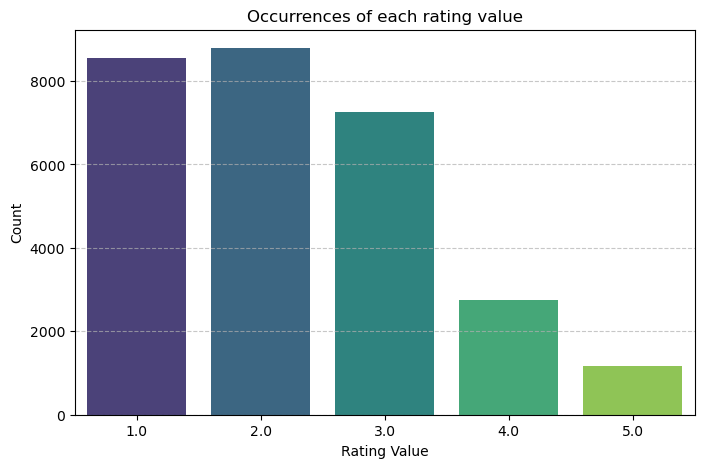

In [243]:
ratings_count = paths_finished['rating'].notna().sum()

total_rows = len(paths_finished)

percentage_valid_ratings = (ratings_count / total_rows) * 100

print(f'Number of rows with valid ratings: {ratings_count}')
print(f'Percentage of rows with valid ratings: {percentage_valid_ratings:.2f}%')

rating_counts = paths_finished['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=rating_counts.index.astype(str), 
    y=rating_counts.values, 
    hue=rating_counts.index.astype(str),  
    palette='viridis', 
    dodge=False, 
    legend=False
)
plt.title('Occurrences of each rating value')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [244]:
ip_count = paths_finished['hashedIpAddress'].value_counts()
ip_count_sorted = ip_count.sort_values(ascending=False)

ip_count_sorted 


hashedIpAddress
0d57c8c57d75e2f5    4865
473d6ac602c2b198     545
7d5624e35c9523ef     292
5bb5836b425e6bfe     243
6b039e9953cf075e     231
                    ... 
431723442d2a136f       1
2da5c64073ffbe4f       1
4bd258066a3e40e5       1
61c264506547bc9c       1
052ba30a41ff5a05       1
Name: count, Length: 14244, dtype: int64

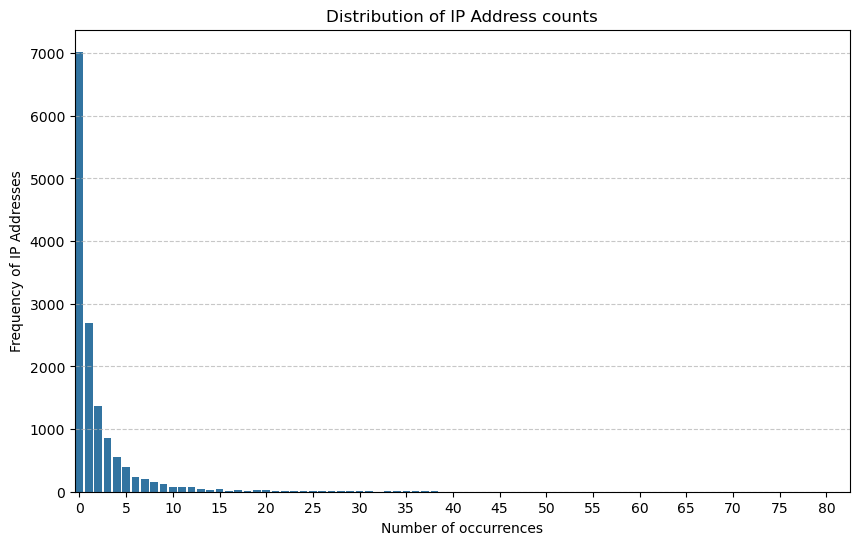

count
1       7022
2       2696
3       1366
4        864
5        547
        ... 
231        1
243        1
292        1
545        1
4865       1
Name: count, Length: 83, dtype: int64

In [245]:
count_distribution = ip_count_sorted.value_counts().sort_index()

# Plot the distribution of counts
plt.figure(figsize=(10, 6))
sns.barplot(x=count_distribution.index, y=count_distribution.values)

plt.title('Distribution of IP Address counts')
plt.xlabel('Number of occurrences')
plt.ylabel('Frequency of IP Addresses')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=current_ticks)
plt.xticks([tick for tick in current_ticks if tick % 5 == 0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

count_distribution

In [246]:
unique_categories_df = categories[['article', 'subcategory_1']].drop_duplicates(subset='article', keep='first')

category_mapping = dict(zip(unique_categories_df['article'], unique_categories_df['subcategory_1']))

paths_with_categories = paths_finished.copy()
link_columns = [col for col in paths_finished.columns if col.startswith('link_')]

for col in link_columns:
    paths_with_categories[col] = paths_with_categories[col].map(category_mapping)

paths_with_categories.head()


,hashedIpAddress,timestamp,durationInSec,path,rating,num_links,link_1,link_2,link_3,link_4,...,link_426,link_427,link_428,link_429,link_430,link_431,link_432,link_433,link_434,link_435
0,6a3701d319fc3754,2011-02-15 03:26:49+00:00,166,14th_century;15th_century;16th_century;Pacific...,NaN,9,History,History,History,Geography,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3824310e536af032,2012-08-12 06:36:52+00:00,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,5,History,Geography,Geography,History,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,415612e93584d30e,2012-10-03 21:10:40+00:00,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,8,History,Geography,Geography,History,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25+00:00,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,4,History,History,History,Countries,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,015245d773376aab,2013-04-23 15:27:08+00:00,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,7,History,Countries,Religion,Science,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/qp/pyvldkl53w97p1km8zjl72vr0000gn/T/ipykernel_36108/119860068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


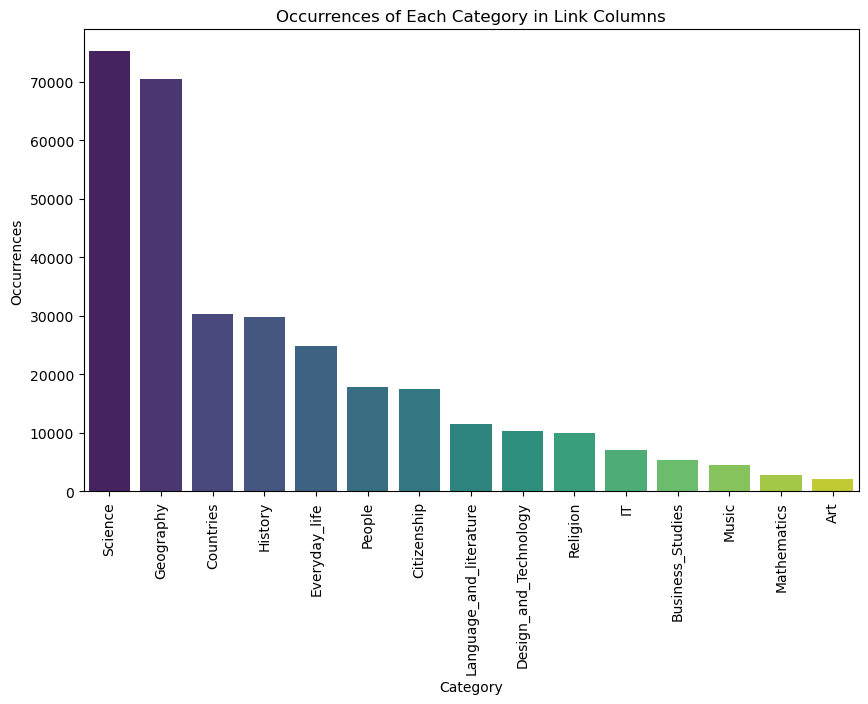

In [247]:
all_categories = paths_with_categories[link_columns].melt(value_name="category")["category"]

category_counts = all_categories.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Occurrences")
plt.title("Occurrences of Each Category in Link Columns")
plt.show()


In [248]:
all_nan_rows = paths_with_categories[link_columns].isna().all(axis=1)

nan_indices = paths_with_categories[all_nan_rows].index

# Drop the rows with all NaN in link columns
paths_with_categories.drop(index=nan_indices, inplace=True)

In [249]:
paths_with_categories = paths_with_categories[paths_with_categories['num_links'] >= 3]

In [250]:
#source and target article categories should not be taken into account
category_dummies = pd.DataFrame()

for index, row in paths_with_categories[link_columns].iterrows():

    non_nan_categories = row.dropna().tolist()
    
    first_category = non_nan_categories[0]
    last_category = non_nan_categories[-1]

    temp_df = pd.get_dummies(row, prefix='', prefix_sep='').sum(axis=0).to_frame().T
    
    temp_df[first_category] = 0
    temp_df[last_category] = 0
    
    category_dummies = pd.concat([category_dummies, temp_df], ignore_index=True)

category_dummies=category_dummies.fillna(0)
category_dummies


,Geography,History,Citizenship,Countries,People,Religion,Science,Everyday_life,Art,Design_and_Technology,Language_and_literature,Music,Business_Studies,IT,Mathematics
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50505,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50506,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


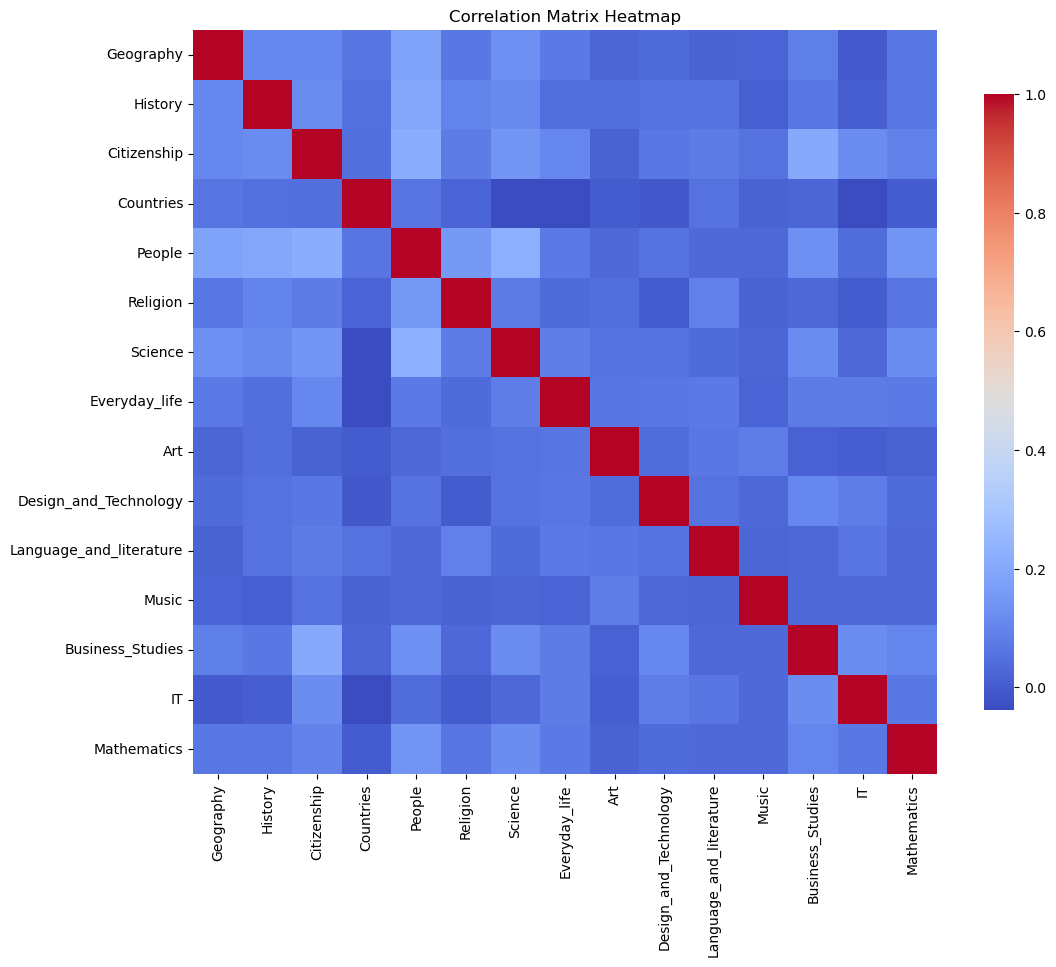

In [251]:
# Calculate the correlation matrix
correlation_matrix = category_dummies.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

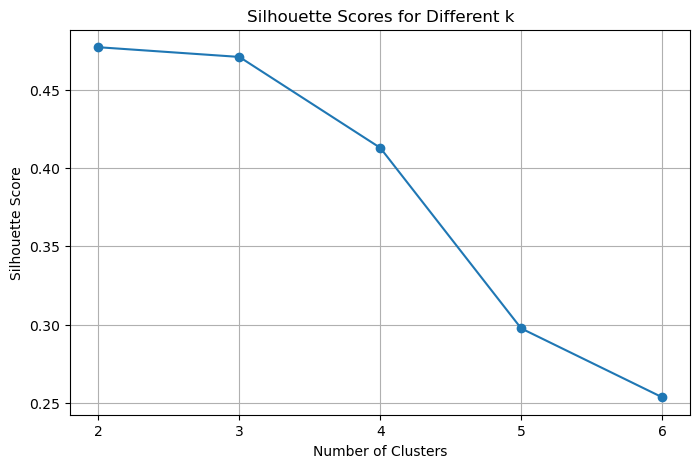

In [253]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

silhouette_scores = []
k_values = range(1, 7)
for k in k_values[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(category_dummies)
    silhouette_scores.append(silhouette_score(category_dummies, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])
plt.grid(True)
plt.show()


/Users/mariannescoglio/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


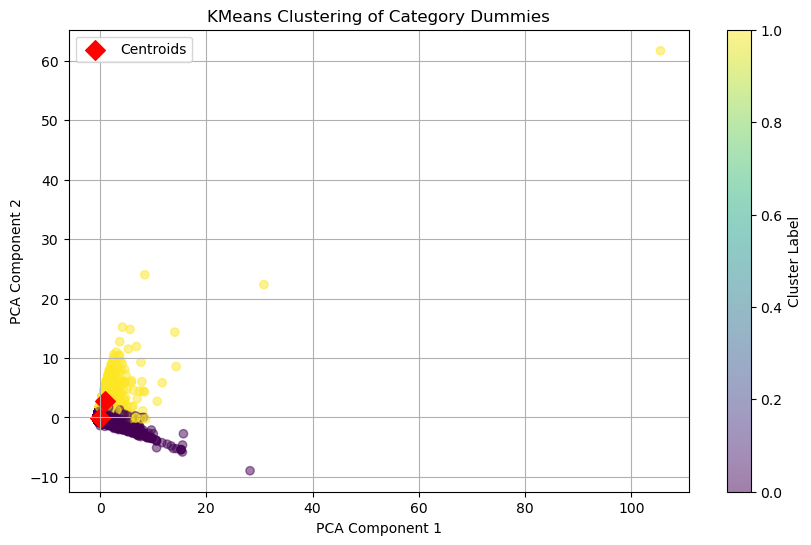

In [254]:
n_clusters = 2 # Specify the number of clusters based on silouhette
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(category_dummies)

labels = model.predict(category_dummies)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(category_dummies)

xs = reduced_data[:, 0]
ys = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(xs, ys, c=labels, alpha=0.5, cmap='viridis')

centroids = model.cluster_centers_
centroids_pca = pca.transform(centroids)
centroids_x = centroids_pca[:, 0]
centroids_y = centroids_pca[:, 1]

plt.scatter(centroids_x, centroids_y, marker='D', s=100, color='red', label='Centroids')

plt.title('KMeans Clustering of Category Dummies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

## Path unfinished

In [ ]:
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


In [ ]:
paths_unfinished.shape

(24875, 6)

In [ ]:
paths_unfinished['timestamp'] = paths_unfinished['timestamp'].apply(lambda ts: datetime.fromtimestamp(ts, tz=timezone.utc))
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15+00:00,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11+00:00,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19+00:00,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01+00:00,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25+00:00,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


In [ ]:
paths_unfinished=split_paths(paths_unfinished)
paths_unfinished

,hashedIpAddress,timestamp,durationInSec,path,target,type,num_links,link_1,link_2,link_3,...,link_226,link_227,link_228,link_229,link_230,link_231,link_232,link_233,link_234,link_235
0,2426091a53125110,2011-02-07 05:02:15+00:00,1804,Obi-Wan_Kenobi,Microsoft,timeout,1,Obi-Wan_Kenobi,None,None,...,None,None,None,None,None,None,None,None,None,None
1,26141fd878806294,2011-02-07 05:14:11+00:00,1805,Julius_Caesar,Caracas,timeout,1,Julius_Caesar,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2b015fb8181c48f2,2011-02-07 15:00:19+00:00,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,3,Malawi,Democracy,Alexander_the_Great,...,None,None,None,None,None,None,None,None,None,None
3,53a53bc244e08a6a,2011-02-07 16:06:01+00:00,49,Paraguay,Mount_St._Helens,restart,1,Paraguay,None,None,...,None,None,None,None,None,None,None,None,None,None
4,53a53bc244e08a6a,2011-02-07 17:18:25+00:00,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,2,Paraguay,Bolivia,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,2014-01-15 12:06:45+00:00,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart,8,Franz_Kafka,Tuberculosis,World_Health_Organization,...,None,None,None,None,None,None,None,None,None,None
24871,232f992e57d43e8d,2014-01-15 12:08:17+00:00,6,Modern_history,Hollandic,restart,1,Modern_history,None,None,...,None,None,None,None,None,None,None,None,None,None
24872,2e09a7224600a7cd,2014-01-15 15:06:40+00:00,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout,5,Computer_programming,Linguistics,Culture,...,None,None,None,None,None,None,None,None,None,None
24873,60af9e2138051b96,2014-01-15 15:24:41+00:00,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout,4,Jamaica,United_Kingdom,World_War_II,...,None,None,None,None,None,None,None,None,None,None


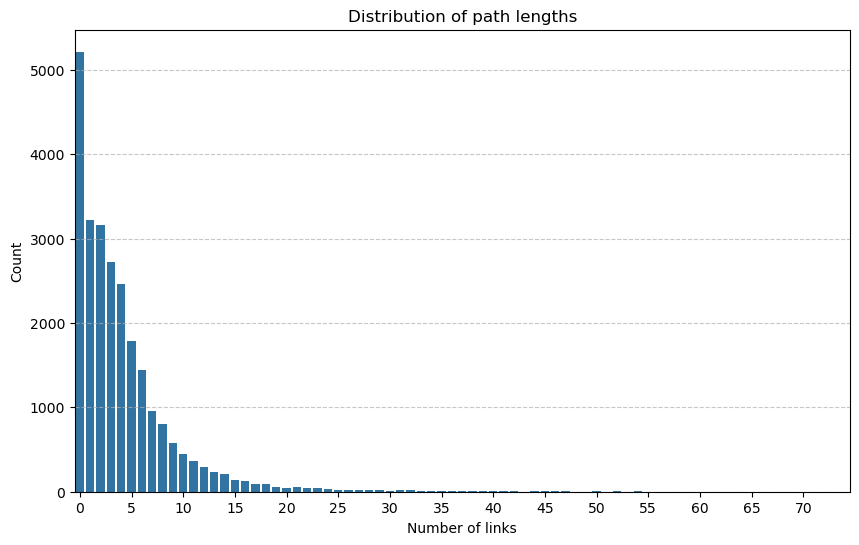

,path,num_links
4247,Tenzing_Norgay;Buddha;God;Christianity;Jesus;A...,235
19267,Telescope;Japan;Tokyo;Pacific_Ocean;Tuna;<;Gre...,171
19258,Telescope;Japan;Wasabi;<;Osaka;<;Tokyo;<;<;Eye...,164
15026,Mount_Everest;Tibet;Chinese_language;<;<;China...,121
7101,Alliterative_verse;J._R._R._Tolkien;C._S._Lewi...,92
...,...,...
14781,Azerbaijani_people,1
6543,Stephen_of_England,1
6537,Microsoft,1
2824,2-8-0,1


In [ ]:
max_length = paths_unfinished['num_links'].max()

plt.figure(figsize=(10, 6))
sns.countplot(x='num_links', data=paths_unfinished)
plt.title('Distribution of path lengths')
plt.xlabel('Number of links')
plt.ylabel('Count')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=current_ticks)
plt.xticks([tick for tick in current_ticks if tick % 5 == 0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sorted_path = paths_unfinished.sort_values(by='num_links', ascending=False)
sorted_path[['path', 'num_links']]

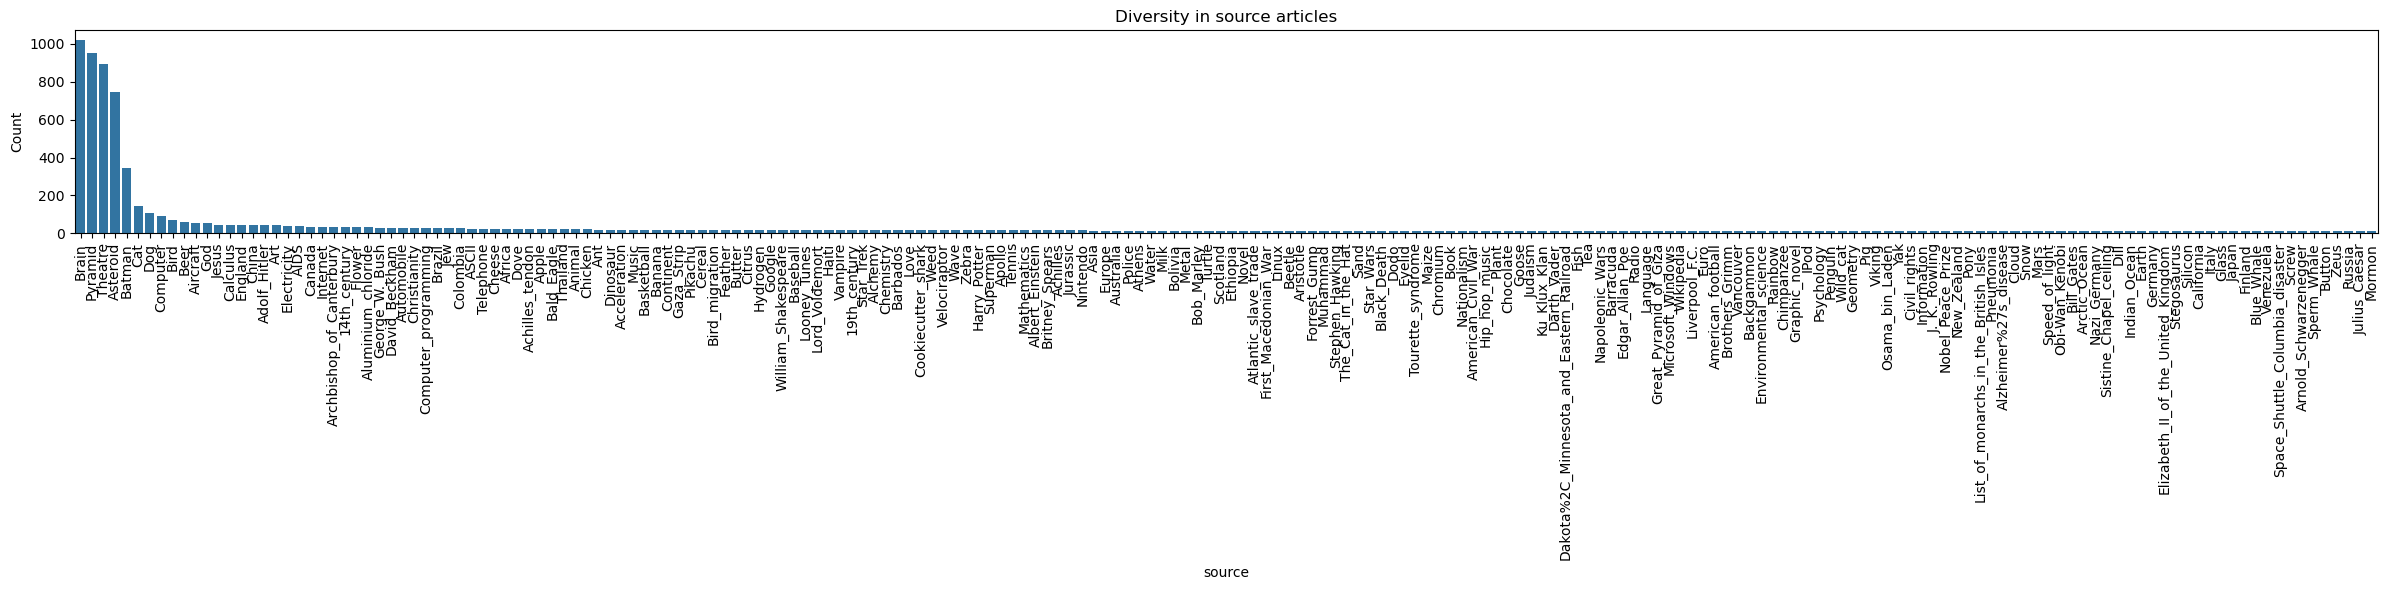

link_1
Brain                          1021
Pyramid                         953
Theatre                         892
Asteroid                        745
Batman                          345
                               ... 
Ankylosaurus                      1
FairTax                           1
Herbert_Hoover                    1
Cocos_%28Keeling%29_Islands       1
Isambard_Kingdom_Brunel           1
Name: count, Length: 3984, dtype: int64

In [ ]:
source_counts = paths_unfinished['link_1'].value_counts()
sorted_source = source_counts.sort_values(ascending=False)

plt.figure(figsize=(24, 6))
sns.barplot(x=sorted_source[:200].index, y=source_counts[:200].values)

plt.title('Diversity in source articles')
plt.xlabel('source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
sorted_source


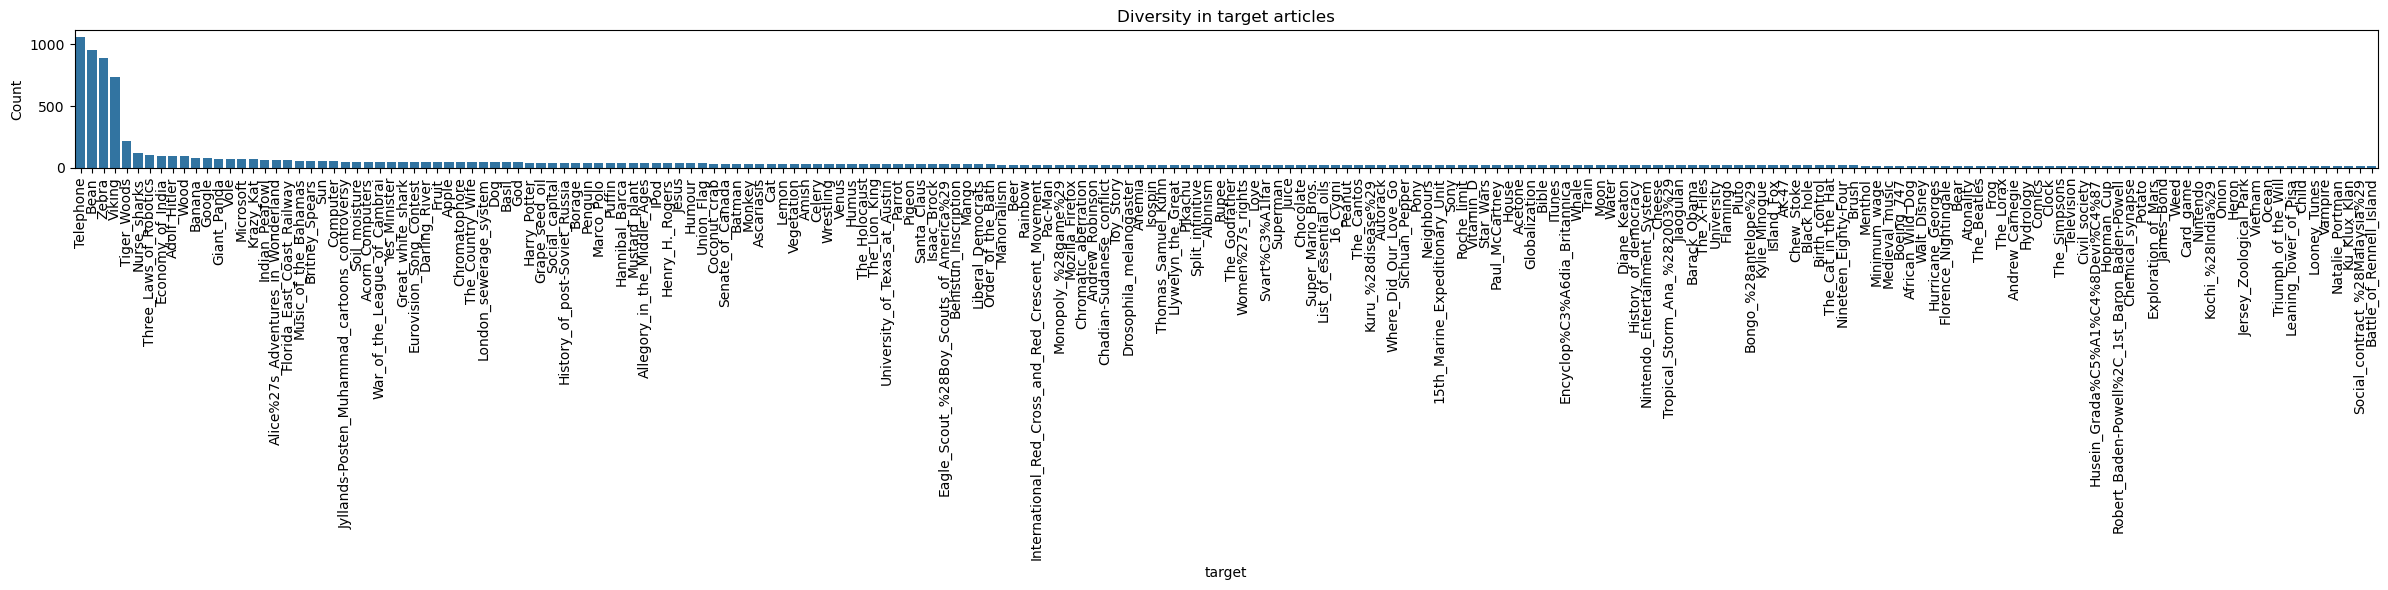

target
Telephone      1060
Bean            950
Zebra           893
Viking          734
Tiger_Woods     218
               ... 
Tellurium         1
Pollinator        1
Arecaceae         1
Afrikaans         1
Sikkim            1
Name: count, Length: 3766, dtype: int64

In [ ]:
target_counts = paths_unfinished['target'].value_counts()
sorted_target = target_counts.sort_values(ascending=False)

plt.figure(figsize=(24, 6))
sns.barplot(x=sorted_target[:200].index, y=target_counts[:200].values)

plt.title('Diversity in target articles')
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
sorted_target


In [ ]:
ip_count = paths_unfinished['hashedIpAddress'].value_counts()
ip_count_sorted = ip_count.sort_values(ascending=False)

ip_count_sorted 

hashedIpAddress
26f76e394525328e    163
75bd20c663d02c8f    152
66b196465d2b5d38    106
7d5624e35c9523ef    101
473d6ac602c2b198     92
                   ... 
2ba2fff9715d467d      1
393d4faa284c1cba      1
0c2e6d186af6e450      1
1393dc6f70503cfe      1
60af9e2138051b96      1
Name: count, Length: 11485, dtype: int64

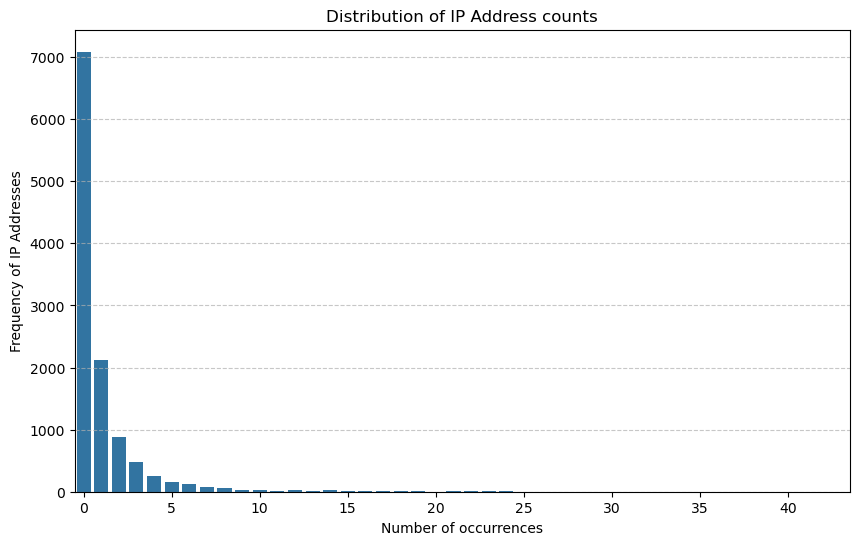

In [ ]:
count_distribution = ip_count_sorted.value_counts().sort_index()

# Plot the distribution of counts
plt.figure(figsize=(10, 6))
sns.barplot(x=count_distribution.index, y=count_distribution.values)

plt.title('Distribution of IP Address counts')
plt.xlabel('Number of occurrences')
plt.ylabel('Frequency of IP Addresses')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=current_ticks)
plt.xticks([tick for tick in current_ticks if tick % 5 == 0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

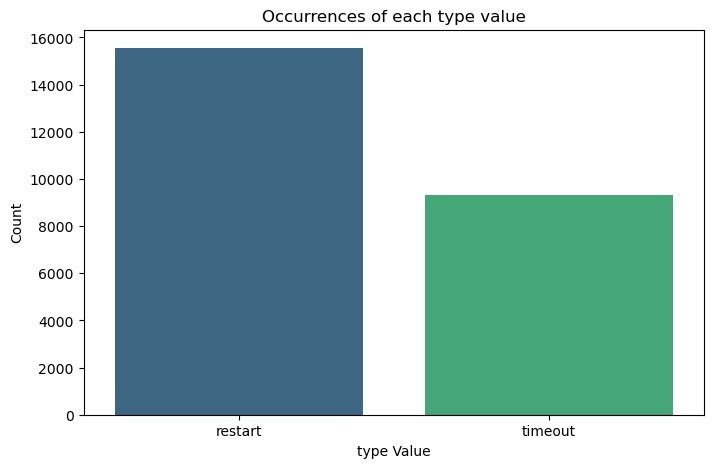

In [ ]:
type_counts = paths_unfinished['type'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=type_counts.index.astype(str), 
    y=type_counts.values, 
    hue=type_counts.index.astype(str),  
    palette='viridis', 
    dodge=False, 
    legend=False
)
plt.title('Occurrences of each type value')
plt.xlabel('type Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()